### Zadanie 1

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.dropna(how='all', inplace=True)
y = pd.DataFrame(data=iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
# standardizing
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(iris_df)
print(np.unique(y) , " " ,y.shape)


[0 1 2]   (150, 1)


In [46]:
# covariance matrix
X_cov = np.cov(X_std, rowvar=False, bias=True)
print('Covariance matrix:\n', X_cov)

Covariance matrix:
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [94]:
# Eigenvalues and Eigenvectors
eig_vals, eig_vecs = np.linalg.eig(X_cov)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print(eig_pairs[0][1].reshape(4, 1).shape)
print(eig_pairs[1][1].reshape(4, 1).shape)
print(eig_pairs[2][1].reshape(4, 1).shape)

matrix_w0 = np.hstack((eig_pairs[0][1].reshape(4,1)))

print('\nMatrix W:\n', matrix_w0)

Y0 = X_std.dot(matrix_w0)
print('\n', Y0.shape)

matrix_w1 = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('\nMatrix W:\n', matrix_w1)

Y1 = X_std.dot(matrix_w1)
print('\n', Y1.shape)

matrix_w2 = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1),
                      eig_pairs[2][1].reshape(4,1)))

print('\nMatrix W:\n', matrix_w2.shape, matrix_w2)



Y2 = X_std.dot(matrix_w2)
print('\n', Y2.shape)



Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.91849782 0.91403047 0.14675688 0.02071484]
(4, 1)
(4, 1)
(4, 1)

Matrix W:
 [ 0.52106591 -0.26934744  0.5804131   0.56485654]

 (150,)

Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]

 (150, 2)

Matrix W:
 (4, 3) [[ 0.52106591 -0.37741762 -0.71956635]
 [-0.26934744 -0.92329566  0.24438178]
 [ 0.5804131  -0.02449161  0.14212637]
 [ 0.56485654 -0.06694199  0.63427274]]

 (150, 3)


In [96]:
for lab, col, mark in zip((0, 1, 2), ('blue', 'red', 'green'), ("o", "x", "*")):
    print(Y2[y.values.flatten() == lab, 0].shape)
    print(Y2[y.values.flatten() == lab, 1].shape)
    print(Y2[y.values.flatten() == lab, 2].shape)

(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)
(50,)


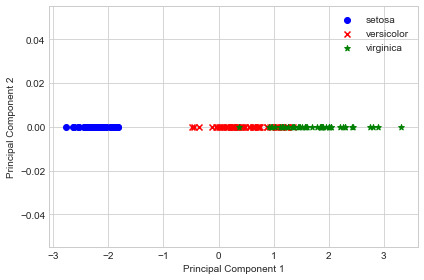

In [84]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col, mark in zip((0, 1, 2), ('blue', 'red', 'green'), ("o", "x", "*")):
        plt.scatter(Y0[y.values.flatten() == lab], [0 for i in range(Y0[y.values.flatten() == lab].shape[0])], label=lab, c=col, marker=mark)

    plt.xlabel('Principal Component 1')
    plt.legend(["setosa", "versicolor", "virginica"], loc='upper right')
    plt.tight_layout()
    plt.show()

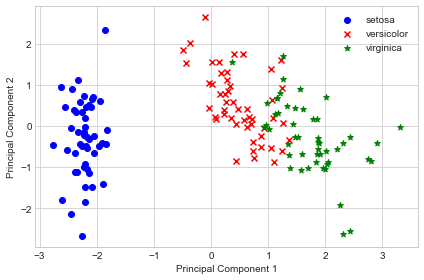

In [85]:


with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col, mark in zip((0, 1, 2), ('blue', 'red', 'green'), ("o", "x", "*")):
        plt.scatter(Y1[y.values.flatten() == lab, 0], Y1[y.values.flatten() == lab, 1], label=lab, c=col, marker=mark)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(["setosa", "versicolor", "virginica"], loc='upper right')
    plt.tight_layout()
    plt.show()


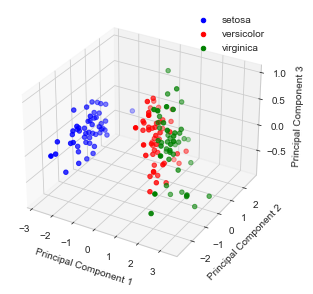

In [102]:
from mpl_toolkits.mplot3d import Axes3D

with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111, projection='3d')
    for lab, col in zip((0, 1, 2), ('blue', 'red', 'green')):
        indices = y.values.flatten() == lab
        ax.scatter(Y2[indices, 0], Y2[indices, 1], Y2[indices, 2], c=col, label=lab)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.legend(["setosa", "versicolor", "virginica"], loc='upper right')
    plt.tight_layout()
    plt.show()




### Zadanie 2

In [104]:
df = pd.read_csv('usarrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [106]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [107]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [109]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=["V1", "V2", "V3","V4"])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [110]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2", "PC3", "PC4"], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


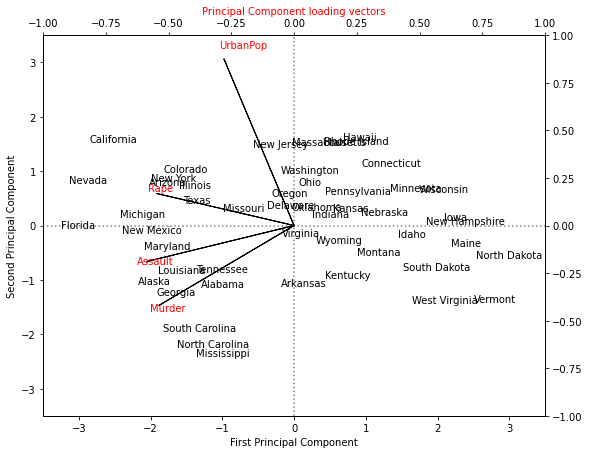

In [113]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
  ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha="center")
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles="dotted", colors="grey")
ax1.vlines(0,-3.5,3.5, linestyles="dotted", colors="grey")
ax1.set_xlabel("First Principal Component")
ax1.set_ylabel("Second Principal Component")
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel("Principal Component loading vectors", color="red")
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and t
a = 1.07
for i in pca_loadings[["V1", "V2"]].index:
  ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color="red")
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [115]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [114]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

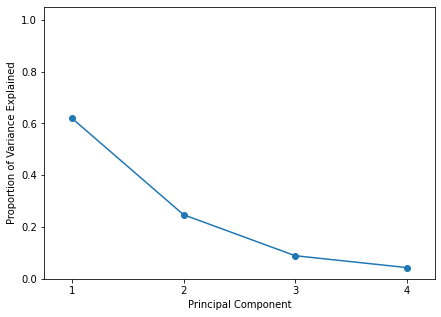

In [117]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, "-o")
plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component")
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

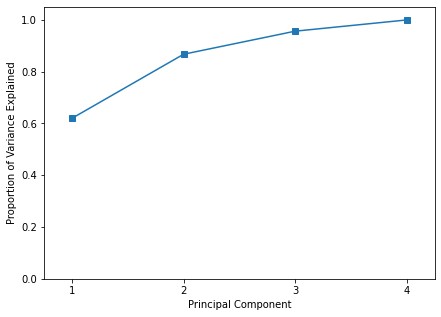

In [118]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), "-s")
plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component")
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

In [119]:
df2 = pd.read_csv("nci60.csv").drop("Unnamed: 0", axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [120]:
y = pd.read_csv("nci60_y.csv", usecols=[1], skiprows=1, names=["type"])


In [121]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

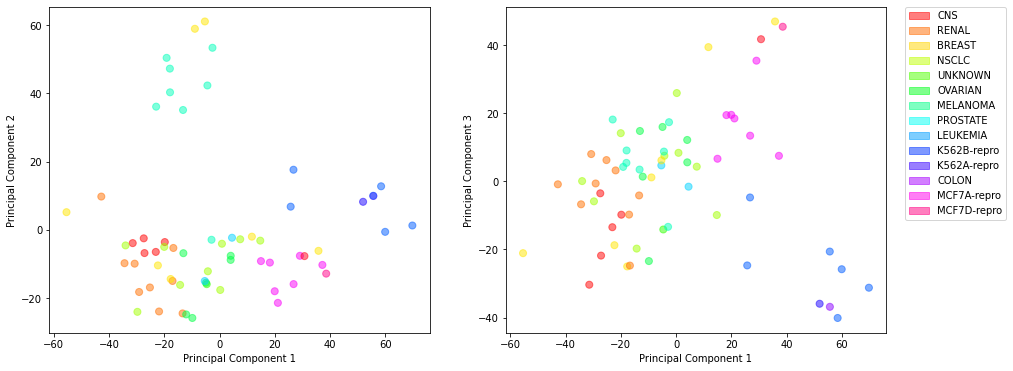

In [122]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel("Principal Component 2")
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel("Principal Component 3")
# Custom legend for the classes (y) since we do not create scatter plots per class (which could
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
  handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
  ax.set_xlabel("Principal Component 1")

In [125]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),pca2.explained_variance_ratio_[:5],np.cumsum(pca2.explained_variance_ratio_[:5])],index=["Standard Deviation", "Proportion of Variance", "Cumulative Proportion"],columns=["PC1", "PC2", "PC3", "PC4", "PC5"])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

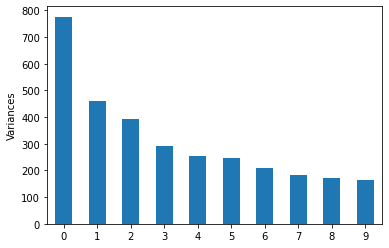

In [126]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind="bar", rot=0)
plt.ylabel("Variances")

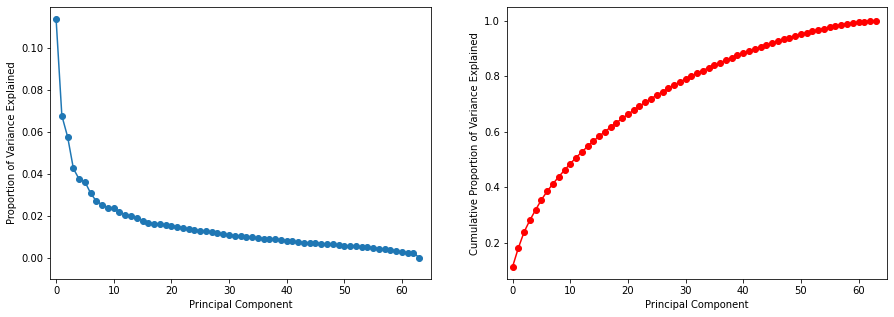

In [127]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, "-o")
ax1.set_ylabel("Proportion of Variance Explained")
ax1.set_ylim(ymin=-0.01)
# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), "-ro")
ax2.set_ylabel("Cumulative Proportion of Variance Explained")
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
  ax.set_xlabel("Principal Component")
  ax.set_xlim(-1,65)